## Purpose
The purpose of this application is to inspect the prostate dataset that we intend
to use for the project in 02450 Intro to Machine Learning

To-do:
We need to fix the indexing of the columns - the way it is implemented right now something strange happens

Author: Peter Bakke

Reviewed by: Greta Tuckute 

Last modified: 24/09/18, 17.40

#### Change-log
2018-09-26: Converted to Jupyter Notebook

Import required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy.linalg import svd
from similarity import similarity



First we define a method for importing a spread_sheet using pandas

In [9]:
def DataLoader(path, sheet):
    """
    Method for importing data from a spreadsheet.

    :param path: full path to the spreadsheet to load
    :param sheet: name of the sheet in the workbook that is loaded
    :return: pandas dataFrame with imported data
    """
    import pandas as pd

    out = pd.read_excel(path, sheet_name=sheet)

    return out

In [34]:
# Specify path and sheet name in the prostate workbook
# filePath = 'C:/Users/PeterBakke/Documents/git/ML_fall2018/Data/Prostate.xlsx'
filePath = 'C:/Users/Greta/Documents/Github/ML_fall2018/Data/Prostate.xlsx'
#filePath = 'C:/Users/narisa/Documents/GitHub/ML_fall2018/Data/Prostate.xlsx'
sheet = 'Sheet1'


In [35]:
# load prostate data into dataFrame
myData = DataLoader(path=filePath, sheet=sheet)

# delete irrelevant columns
del myData['ID']
del myData['train']

In [36]:
# extract class names and encode with integers (dict)

classLabels = myData['Gleason'].values.tolist()
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(4)))

#del myData['Gleason']

attributeNames = list(myData.columns.values)

print(attributeNames)
print(classDict)

['lCaVol', 'lWeight', 'Age', 'lBPH', 'SVI', 'lCP', 'Gleason', 'pgg45', 'lPSA']
{6: 0, 7: 1, 8: 2, 9: 3}


In [37]:
# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Convert dataFrame to numpy array
X = myData.values

# Compute values of N, M and C
N = len(y)
M = len(attributeNames)
C = len(classNames)

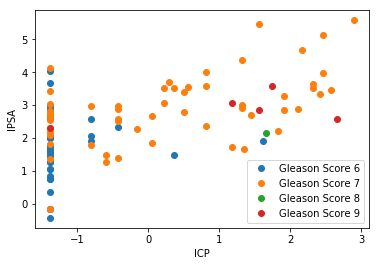

In [15]:
# Data attributes to be plotted
i = 5
j = 7

# Plotting the data set (different attributes to be specified)
f = plt.figure()
#plt.title('Prostate data of attributes: ' + str(attributeNames[i]) + ' vs. ' + str(attributeNames[j]))

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(X[class_mask,i], X[class_mask,j], 'o')

#plt.legend(classNames)
gleason_legend = ['Gleason Score 6', 'Gleason Score 7', 'Gleason Score 8', 'Gleason Score 9']
plt.legend(gleason_legend)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])

# plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + attributeNames[i] +  "_vs_" + attributeNames[j]+".png")

# Output result to screen
plt.show()

## Principal Component Analysis
In the following section of the notebook a PCA is performed

In [18]:
# Normalize data with mean and std
Y = (X - np.ones((N,1))*X.mean(axis=0)) / X.std(axis=0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

Z = np.dot(Y, V.T)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()

print("The variance explained by each PCA is: \n " + str(rho))
print("Fast check to ensure that we sum over the right axis: " + str(rho.sum()))

print("The first eigenvector is: \n" + str(V.T[0,:]))
print("The second eigenvector is: \n" + str(V.T[1,:]))
print("The third eigenvector is: \n" + str(V.T[2,:]))

The variance explained by each PCA is: 
 [0.43903305 0.20535007 0.1072922  0.07579967 0.05861728 0.05352628
 0.04043515 0.01994631]
Fast check to ensure that we sum over the right axis: 1.0
The first eigenvector is: 
[ 0.44512589 -0.0964064   0.1980779  -0.23478474  0.56584709 -0.00908399
  0.26172513 -0.55627738]
The second eigenvector is: 
[ 0.24180931  0.51116273  0.39759632 -0.12904273 -0.46575046  0.50145242
  0.16157167 -0.1049887 ]
The third eigenvector is: 
[ 0.19990715  0.45116797 -0.58073803 -0.60062759  0.05205965 -0.15855467
 -0.02220796  0.17358411]


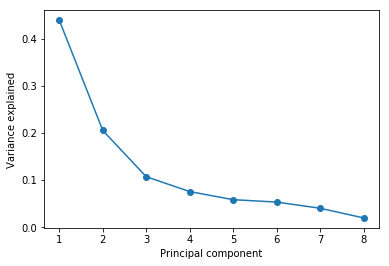

In [19]:
# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'o-')
#plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
#plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/Variance_explained.png")
plt.show()

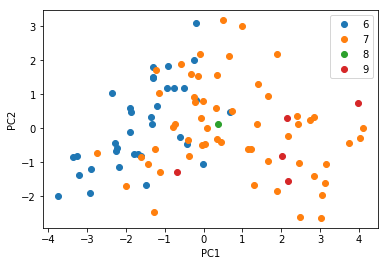

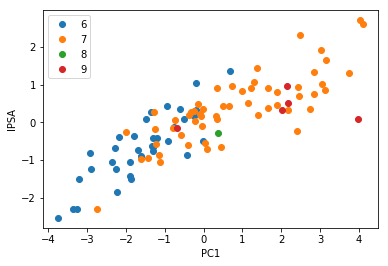

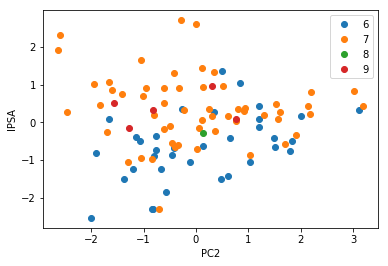

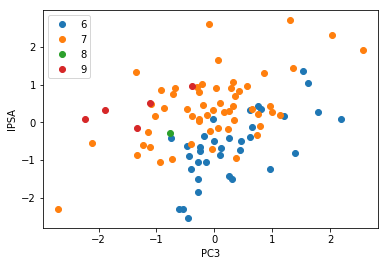

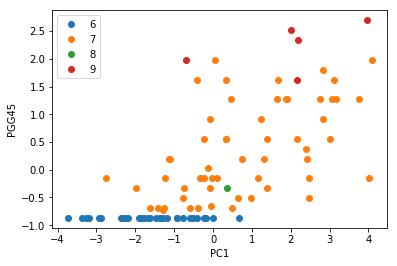

In [20]:
# Indices of the principal components to be plotted
ii = 0
jj = 1

# Plot PCA of the data
f = plt.figure()
#plt.title('Prostate data: PC' + str(ii+1) + ' vs. '+ 'PC' + str(jj+1))
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,ii], Z[class_mask,jj], 'o')
plt.legend(classNames)
plt.xlabel('PC{0}'.format(ii+1))
plt.ylabel('PC{0}'.format(jj+1))
# plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + 'PC{0}'.format(ii+1) +  "_vs_" + 'PC{0}'.format(jj+1) + ".png")

# Plot PCA_ii of the data against lpsa
f = plt.figure()
#plt.title('Prostate data: PC' + str(ii+1) + ' against lPSA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,ii], Y[class_mask,7], 'o')
plt.legend(classNames)
plt.xlabel('PC{0}'.format(ii+1))
plt.ylabel('lPSA')
#plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + 'PC{0}'.format(ii+1) +  "_vs_" + "lPSA.png")

# Plot PCA_ii+1 of the data against lpsa
f = plt.figure()
#plt.title('Prostate data: PC' + str(ii+2) + ' against lPSA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,ii+1], Y[class_mask,7], 'o')
plt.legend(classNames)
plt.xlabel('PC{0}'.format(ii+2))
plt.ylabel('lPSA')
#plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + 'PC{0}'.format(ii+2) +  "_vs_" + "lPSA.png")


# Plot PCA_ii+2 of the data against lpsa
f = plt.figure()
#plt.title('Prostate data: PC' + str(ii+3) + ' against lPSA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,ii+2], Y[class_mask,7], 'o')
plt.legend(classNames)
plt.xlabel('PC{0}'.format(ii+3))
plt.ylabel('lPSA')
#plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + 'PC{0}'.format(ii+3) +  "_vs_" + "lPSA.png")



# Plot PCA_ii of the data against Gleason
f = plt.figure()
#plt.title('Prostate data: PC' + str(ii+1) + ' against PGG45')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,ii], Y[class_mask,6], 'o')
plt.legend(classNames)
plt.xlabel('PC{0}'.format(ii+1))
plt.ylabel('PGG45')
#plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/" + 'PC{0}'.format(ii+1) +  "_vs_" + "PGG45.png")


# Output result to screen
plt.show()

## The following section contains summary statistics and boxplots


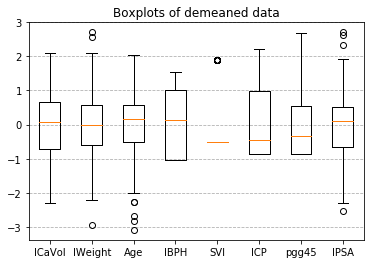

In [21]:
# Make Boxplots
plt.figure()
plt.boxplot(Y)
plt.title('Boxplots of demeaned data');
plt.xticks([1,2,3,4,5,6,7,8],attributeNames)
plt.grid(axis='y',linestyle='dashed')
# plt.savefig("C:/Users/PeterBakke/Documents/git/ML_fall2018/Figures/Boxplots.png")
plt.show()

In [22]:
# Summary statistics
# Create dict of attribute dictonaries using comprehensions
keys = ['mean', 'std', 'median', 'range', 'Q_25', 'Q_75', 'min', 'max']

statistics={name:{key:[] for key in keys} for name in attributeNames}

for attribute in statistics:
    k = attributeNames.index(attribute)
    statistics[attribute]['mean'] = X[:,k].mean()
    statistics[attribute]['std'] = X[:,k].std(ddof=1)
    statistics[attribute]['median'] = np.median(X[:,k])
    statistics[attribute]['range'] = X[:,k].max()-X[:,k].min()
    statistics[attribute]['Q_25'] = np.percentile(X[:,k],25)
    statistics[attribute]['Q_75'] = np.percentile(X[:,k],75)
    statistics[attribute]['min'] = X[:,k].min()
    statistics[attribute]['max'] = X[:,k].max()

In [23]:
statistics['pgg45']

{'mean': 24.38144329896907,
 'std': 28.204034617914548,
 'median': 15.0,
 'range': 100.0,
 'Q_25': 0.0,
 'Q_75': 40.0,
 'min': 0.0,
 'max': 100.0}

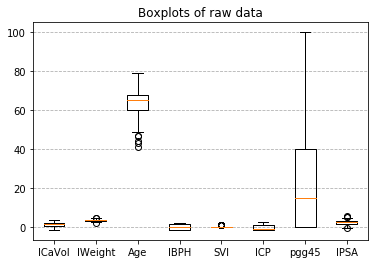

In [24]:
# Create Boxplot of raw data
plt.figure()
plt.boxplot(X)
plt.title('Boxplots of raw data');
plt.xticks([1,2,3,4,5,6,7,8],attributeNames)
plt.grid(axis='y',linestyle='dashed')
plt.show()    

In [20]:
# Create Boxplot of raw data without Age, SVI and pgg45

# Attribute to use as query

selected_rows = [0,1,3,5,6,8]
selected_names = []

for i in selected_rows:
    selected_names.append(attributeNames[i])

# Create Boxplot of raw data with Age and pgg45
selected_rows2 = [2,7]
selected_names2 = []

for i in selected_rows2:
    selected_names2.append(attributeNames[i])

#plot boxplots together
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.subplot(1, 2, 1)
plt.boxplot(X[:,selected_rows])
#plt.title('Boxplots of raw data');
plt.xticks([1,2,3,4,5,6], selected_names)
plt.grid(axis='y',linestyle='dashed')

plt.subplot(1, 2, 2)
plt.boxplot(X[:,selected_rows2])
#plt.title('Boxplots of raw data');
plt.xticks([1,2],selected_names2)
plt.grid(axis='y',linestyle='dashed')
plt.show() 


IndexError: list index out of range

In [25]:
#Covariance and correlation

np.set_printoptions(threshold=np.nan)

# Covariance of X
covariance_X = np.cov(X)
#print(covariance_X)

#correlation of X
correlation_X = np.corrcoef(X, rowvar=False)
print(attributeNames)
print(correlation_X)

['lCaVol', 'lWeight', 'Age', 'lBPH', 'SVI', 'lCP', 'pgg45', 'lPSA']
[[ 1.          0.28052138  0.22499988  0.0273497   0.538845    0.67531048
   0.43365225  0.73446033]
 [ 0.28052138  1.          0.34796911  0.4422644   0.1553849   0.16453714
   0.10735379  0.43331938]
 [ 0.22499988  0.34796911  1.          0.3501859   0.11765804  0.12766775
   0.27611245  0.16959284]
 [ 0.0273497   0.4422644   0.3501859   1.         -0.08584324 -0.00699943
   0.07846002  0.1798094 ]
 [ 0.538845    0.1553849   0.11765804 -0.08584324  1.          0.67311118
   0.45764762  0.56621822]
 [ 0.67531048  0.16453714  0.12766775 -0.00699943  0.67311118  1.
   0.63152825  0.54881317]
 [ 0.43365225  0.10735379  0.27611245  0.07846002  0.45764762  0.63152825
   1.          0.42231586]
 [ 0.73446033  0.43331938  0.16959284  0.1798094   0.56621822  0.54881317
   0.42231586  1.        ]]


In [26]:
########## Similarity analysis ###########

# Attribute to use as query

# Similarity: 'SMC', 'Jaccard', 'ExtendedJaccard', 'Cosine', 'Correlation' 
similarity_measure = 'correlation'

N, M = X.shape
# Search for similar attributes
# Index of all other attributes than i

for i in range(8):
    noti = list(range(0,i)) + list(range(i+1,M)) 
    # Compute similarity between attribute i and all others
    sim = similarity(X[:,i], X[:,noti].T, similarity_measure)
    sim = sim.tolist()[0]
    # Tuples of sorted similarities and their attribute name
    Name = []
    for number in noti:
        Name.append(attributeNames[number])
    sim_to_index = sorted(zip(sim, Name))
    print('Similarity of ', attributeNames[i], 'to:')
    print(sim_to_index)
    

Similarity of  lCaVol to:
[(0.02734970330362531, 'lBPH'), (0.22499987914993155, 'Age'), (0.280521380009833, 'lWeight'), (0.43365224902809046, 'pgg45'), (0.5388450022638601, 'SVI'), (0.6753104840558688, 'lCP'), (0.7344603262136732, 'lPSA')]
Similarity of  lWeight to:
[(0.10735378533094626, 'pgg45'), (0.15538490280412495, 'SVI'), (0.16453714174666803, 'lCP'), (0.280521380009833, 'lCaVol'), (0.3479691120147088, 'Age'), (0.43331938249261986, 'lPSA'), (0.44226439926433353, 'lBPH')]
Similarity of  Age to:
[(0.11765803822258399, 'SVI'), (0.12766775223999327, 'lCP'), (0.16959283918685045, 'lPSA'), (0.22499987914993155, 'lCaVol'), (0.27611244500842985, 'pgg45'), (0.3479691120147088, 'lWeight'), (0.3501858961051843, 'lBPH')]
Similarity of  lBPH to:
[(-0.08584323800391731, 'SVI'), (-0.006999431214984304, 'lCP'), (0.02734970330362531, 'lCaVol'), (0.07846001781443268, 'pgg45'), (0.17980940394145728, 'lPSA'), (0.3501858961051843, 'Age'), (0.44226439926433353, 'lWeight')]
Similarity of  SVI to:
[(-0.

Similarity of lCaVol to:
[(0.02734970330362529, 'lBPH'), (0.22499987914993147, 'Age'), (0.280521380009833, 'lWeight'), (0.43241705582585394, 'Gleason'), (0.43365224902809035, 'pgg45'), (0.5388450022638602, 'SVI'), (0.6753104840558688, 'lCP'), (0.734460326213673, 'lPSA')]
Similarity of lWeight to:
[(0.056882093361876974, 'Gleason'), (0.10735378533094632, 'pgg45'), (0.15538490280412506, 'SVI'), (0.16453714174666806, 'lCP'), (0.280521380009833, 'lCaVol'), (0.34796911201470887, 'Age'), (0.43331938249262, 'lPSA'), (0.44226439926433353, 'lBPH')]
Similarity of Age to:
[(0.11765803822258403, 'SVI'), (0.12766775223999327, 'lCP'), (0.16959283918685045, 'lPSA'), (0.22499987914993147, 'lCaVol'), (0.2688915985037052, 'Gleason'), (0.27611244500842985, 'pgg45'), (0.34796911201470887, 'lWeight'), (0.35018589610518425, 'lBPH')]
Similarity of lBPH to:
[(-0.08584323800391734, 'SVI'), (-0.0069994312149842626, 'lCP'), (0.02734970330362529, 'lCaVol'), (0.07782044719266018, 'Gleason'), (0.07846001781443265, 

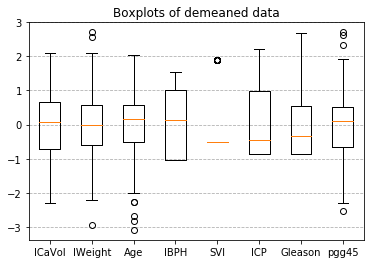

In [38]:
# Z-scoring (standardizing) the data (X) in order to compute more meaningful similarity measures
    
X_zscore = zscore(X)

for i in range(8):
    noti = list(range(0,i)) + list(range(i+1,M)) 
    # Compute similarity between attribute i and all others
    sim = similarity(X_zscore[:,i], X_zscore[:,noti].T, similarity_measure)
    sim = sim.tolist()[0]
    # Tuples of sorted similarities and their attribute name
    Name = []
    for number in noti:
        Name.append(attributeNames[number])
    sim_to_index = sorted(zip(sim, Name))
    print('Similarity of', attributeNames[i], 'to:')
    print(sim_to_index)
    

# Calculate projections of Y on Eqigenvector
plt.figure()
plt.boxplot(Y)
plt.title('Boxplots of demeaned data');
plt.xticks([1,2,3,4,5,6,7,8],attributeNames)
plt.grid(axis='y',linestyle='dashed')
plt.show()


[ 0.24180931  0.51116273  0.39759632 -0.12904273 -0.46575046  0.50145242
  0.16157167 -0.1049887 ]
[]
